In [2]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats

In [3]:
x=pd.read_csv('../../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','L102900', ]]

In [4]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [5]:
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia

print(data.shape)

(159381, 408)


In [6]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [8]:
corr=data[numerical_cols].corr()
corr=corr.L102900_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
278,L102900_y,1.000000
134,L393800,1.000000
153,L501900,0.962772
176,L511300,0.901103
26,L102900_x,0.726413


In [9]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [10]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
0,L102900_y,1.000000,158890
4,L102900_x,0.726413,158941
6,L103200,0.646128,158879
16,L103300,0.442681,135222
27,L103000,0.272072,158939
36,max,0.212042,58375
37,L101100,0.210139,77885
39,S000300,0.195928,159075
40,L104600,0.186412,56437
41,AGE,0.182023,159381


In [11]:
print(list(mergedColCorrCount.head(15).Col))

['L102900_y', 'L102900_x', 'L103200', 'L103300', 'L103000', 'max', 'L101100', 'S000300', 'L104600', 'AGE', 'B_DAY', 'L101700', 'L100800', 'L100700', 'S000501']


Anova test - For categorical values [Questionnaire answers]
=======

In [14]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [15]:
colslist=mydataset.columns
DiabeticColVals=data.L102900_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [16]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [17]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
11,FIELD_21,318.673436,3.308272e-71,158873
23,FIELD_33,296.848707,2.379799e-317,158577
4,FIELD_14,136.992377,3.599246e-60,158868
17,FIELD_27,136.247322,1.814595e-31,158872
28,FIELD_38,99.385529,1.234970e-145,158585
18,FIELD_28,77.871888,1.110259e-18,158873
15,FIELD_25,68.726527,1.139772e-16,158873
1,FIELD_4,63.631658,5.820223e-92,156468
8,FIELD_18,59.497890,1.231319e-14,158872
21,FIELD_31,53.903527,2.115797e-13,158873


In [18]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_21', 'FIELD_33', 'FIELD_14', 'FIELD_27', 'FIELD_38', 'FIELD_28', 'FIELD_25', 'FIELD_4', 'FIELD_18', 'FIELD_31']


========================= LASSO method
================

In [20]:
selectedcols=['L102900_y', 'L102900_x', 'L103200', 'L103300', 'L103000', 'max', 'L101100', 'S000300', 
              'L104600', 'AGE', 'B_DAY', 'L101700', 'L100800', 'L100700', 'S000501','FIELD_21', 'FIELD_33', 
              'FIELD_14', 'FIELD_27', 'FIELD_38', 'FIELD_28', 'FIELD_25', 'FIELD_4', 'FIELD_18', 'FIELD_31'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(8340, 25)


In [21]:
x=data2[['L102900_x', 'L103200', 'L103300', 'L103000', 'max', 'L101100', 'S000300', 
              'L104600', 'AGE', 'B_DAY', 'L101700', 'L100800', 'L100700', 'S000501','FIELD_21', 'FIELD_33', 
              'FIELD_14', 'FIELD_27', 'FIELD_38', 'FIELD_28', 'FIELD_25', 'FIELD_4', 'FIELD_18', 'FIELD_31']]
y=data2.L102900_y

In [22]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 6.44064433e-01  5.87142047e-02  1.43157028e+00  2.51962061e-02
 -0.00000000e+00 -3.91641468e+00  1.12935776e-01  6.36402451e-03
 -1.23540456e+00 -1.53430356e-04 -5.22725198e-03 -7.02893608e-02
 -1.22726307e+00 -6.27446379e-03 -0.00000000e+00  7.75456135e-01
 -0.00000000e+00 -0.00000000e+00  2.51595847e-01  8.87705360e-01
 -3.58399148e-01 -3.68070713e-01 -0.00000000e+00 -0.00000000e+00]
231.35434322969414


,Name,coeff
5,L101100,3.916415
2,L103300,1.431570
8,AGE,1.235405
12,L100700,1.227263
19,FIELD_28,0.887705
15,FIELD_33,0.775456
0,L102900_x,0.644064
21,FIELD_4,0.368071
20,FIELD_25,0.358399
18,FIELD_38,0.251596


In [23]:
print(list(lassod.Name[:16]))

['L101100', 'L103300', 'AGE', 'L100700', 'FIELD_28', 'FIELD_33', 'L102900_x', 'FIELD_4', 'FIELD_25', 'FIELD_38', 'S000300', 'L100800', 'L103200', 'L103000', 'L104600', 'S000501']


=============================== SelectKBest method
========================

In [24]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:13]))

['L102900_x', 'L103200', 'L103300', 'L103000', 'max', 'L101100', 'S000300', 'L104600', 'AGE', 'B_DAY', 'L101700', 'L100800', 'L100700']


========================================= LinearSVC
===============

In [25]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [26]:
# X_new

================================ SequentialFeatureSelector 
================================

In [27]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.07152847 0.06952149 0.06557259 0.06962003 0.00794692 0.04471556
 0.0667738  0.06758157 0.06343648 0.06769546 0.06528852 0.06536257
 0.06726585 0.06691622 0.00057073 0.00990267 0.00111091 0.00881223
 0.03883727 0.00803408 0.00453498 0.04568552 0.00604204 0.01724405]


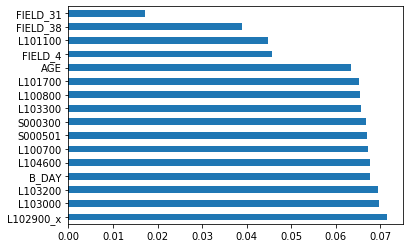

L102900_x    0.071528
L103000      0.069620
L103200      0.069521
B_DAY        0.067695
L104600      0.067582
L100700      0.067266
S000501      0.066916
S000300      0.066774
L103300      0.065573
L100800      0.065363
L101700      0.065289
AGE          0.063436
FIELD_4      0.045686
dtype: float64
Index(['L102900_x', 'L103000', 'L103200', 'B_DAY', 'L104600', 'L100700',
       'S000501', 'S000300', 'L103300', 'L100800', 'L101700', 'AGE',
       'FIELD_4'],
      dtype='object')


In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(13))
print(feat_importances.nlargest(13).index)

============================= Backward Elimination
========

In [ ]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp=temp.drop(columns=['L103000','L103300','L190300','FIELD_40','FIELD_27','FIELD_29','FIELD_21','FIELD_5','FIELD_14'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp=temp.drop(columns=['FIELD_33'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp.columns